In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_circles
from scipy.special import expit
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification

In [25]:
## make 2-class dataset for classification
#centers = [[-5, 0], [0, 1.5]]
#x, y = make_blobs(n_samples=10000, centers=centers, random_state=42)

# generate 2 class dataset
x, y = make_classification(n_samples=10000, n_classes=2, weights=[0.9,0.5], random_state=42)

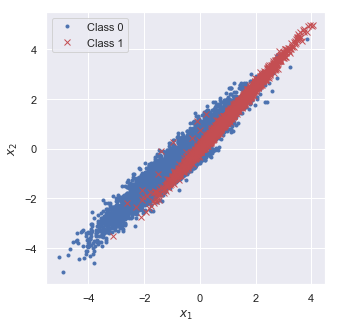

In [26]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [4]:
# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## k-NN

In [5]:
# Set parameters for grid-search.
param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 10, 20]}]

# Instantiate k-NN class.
clf = KNeighborsClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=3, n_jobs=-1)

# Find best hyperparameters.
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  2.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 10, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [6]:
grid_search.best_params_

{'n_neighbors': 20, 'weights': 'distance'}

In [7]:
# Prediction.
y_pred = grid_search.predict(x_test)

In [8]:
# Accuracy score.
accuracy_score(y_test, y_pred)

0.882

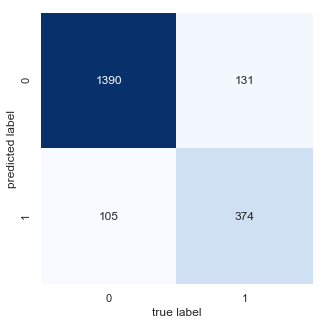

In [9]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

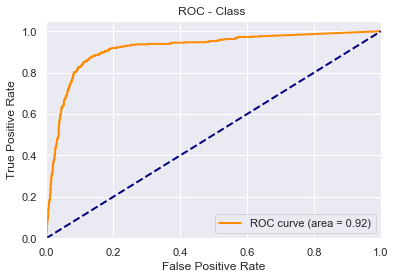

In [10]:
# Getting the probabilities for each class.
y_prob = grid_search.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
plt.figure()
lw = 2
# Calculating ROC curve and ROC AUC.
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc_knn = roc_auc_score(y_test, y_prob[:,1])

plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [11]:
# Instantiate Logistic classifier.
clf = LogisticRegression(solver='lbfgs')
# Train the model.
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
# Prediction.
y_pred = clf.predict(x_test)

In [13]:
# Accuracy score.
accuracy_score(y_test, y_pred)

0.8715

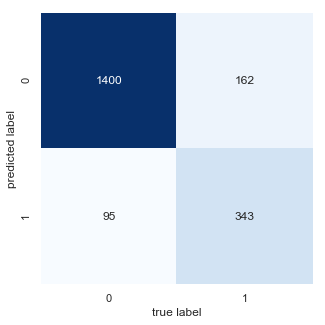

In [14]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

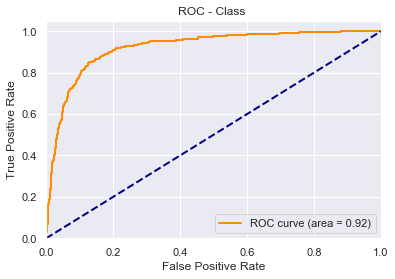

In [15]:
# Getting the probabilities for each class.
y_prob = clf.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
plt.figure()
lw = 2
# Calculating ROC curve and ROC AUC.
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc_lr = roc_auc_score(y_test, y_prob[:,1])

plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")
plt.show()

## GaussianNB

In [16]:
# Instantiate a Gaussian Naive Bayes model.
clf = GaussianNB()

In [17]:
# Train the MultinomialNB model.
clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
# Prediction.
y_pred = clf.predict(x_test)

In [19]:
# Accuracy score.
accuracy_score(y_test, y_pred)

0.846

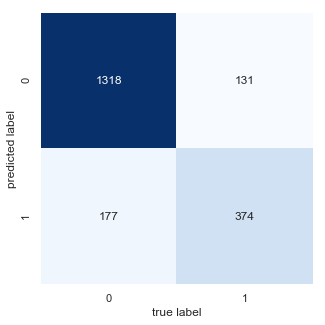

In [20]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

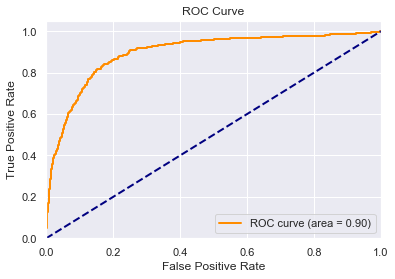

In [21]:
# Getting the probabilities for each class.
y_prob = clf.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
plt.figure()
lw = 2
# Calculating ROC curve and ROC AUC.
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc_gnb = roc_auc_score(y_test, y_prob[:,1])

plt.plot(fpr_gnb, tpr_gnb, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Plot an unified graph

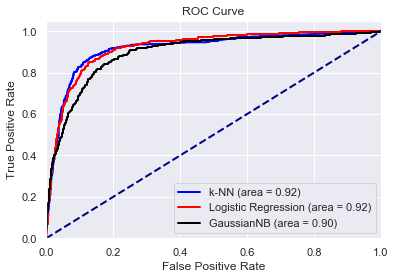

In [22]:
# Compute ROC curve
plt.figure()
lw = 2

plt.plot(fpr_knn, tpr_knn, color='blue', lw=lw, label='k-NN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_lr, tpr_lr, color='red', lw=lw, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_gnb, tpr_gnb, color='black', lw=lw, label='GaussianNB (area = %0.2f)' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()